# Transformers

In [10]:
#set up the workspace, environment and load libraries
#----------------------------------------------------
#Set sytem version
import sys
assert sys.version_info >= (3, 7)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#import sklearn
import sklearn
assert sklearn.__version__>="0.20"

#import tensorflow
from packaging import version
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

#import libraries
import pandas as pd
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
import time
import random

#Figure setup
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Load the mfccs

In [11]:
mfcc_audio = pd.read_csv("padded_truncated_mfcc_500ms.csv")
# Define the mapping dictionary
label_mapping = {'S1': 1, 'NS': 0}

# Replace values in the 'label' column using the mapping dictionary
mfcc_audio['label'] = mfcc_audio['label'].replace(label_mapping)

In [12]:
mfcc_audio.head()


,wav_id,start_time,end_time,duration,label,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,num_mfcc_values
0,Video_00_048.wav,360.009025,1004.479277,644.470252,N,"[-457.62152099609375, -423.6544189453125, -423...","[180.27822875976562, 192.37777709960938, 190.1...","[-46.55135726928711, -55.360748291015625, -58....","[29.633108139038086, 38.31001663208008, 41.219...","[14.985190391540527, 10.325323104858398, 12.77...","[-7.803989887237549, -12.569154739379883, -14....","[19.05384063720703, 30.294071197509766, 27.956...","[-6.8839263916015625, -7.2773613929748535, -11...","[3.406224012374878, -1.2452659606933594, -1.42...","[0.43813490867614746, 5.550304412841797, 12.75...","[-7.568911552429199, -8.539149284362793, -6.43...","[20.410778045654297, 14.124442100524902, 10.14...","[-5.530827522277832, -2.002898931503296, -1.29...",12
1,Video_00_048.wav,1004.479277,1007.469037,2.989760,1,"[-446.1954650878906, -428.2998046875, -427.552...","[173.7025146484375, 196.93731689453125, 195.11...","[-48.24112319946289, -62.029640197753906, -61....","[37.417236328125, 40.656822204589844, 40.70912...","[12.04389762878418, 7.314050674438477, 5.28384...","[-11.246479034423828, -10.907875061035156, -9....","[25.764732360839844, 24.88536834716797, 26.703...","[-4.200786113739014, -9.397178649902344, -11.8...","[0.5680117011070251, 2.1019794940948486, 4.341...","[14.922066688537598, 9.592718124389648, 13.565...","[-6.758081436157227, -12.35927677154541, -10.6...","[8.501708984375, 12.48485279083252, 11.8971195...","[1.275317907333374, -0.5228666067123413, -1.75...",12
2,Video_00_048.wav,1007.469037,1008.029617,0.560580,N,"[-446.1818542480469, -423.3657531738281, -433....","[187.3101348876953, 198.33355712890625, 187.89...","[-59.414215087890625, -66.1434326171875, -51.2...","[32.53831481933594, 38.590206146240234, 35.375...","[11.502541542053223, 11.062651634216309, 10.23...","[-7.622556686401367, -10.298709869384766, -2.1...","[16.550277709960938, 22.566612243652344, 31.05...","[-13.558095932006836, -11.147981643676758, -8....","[-0.7724004983901978, -3.111318826675415, -1.7...","[6.931612968444824, 8.356032371520996, 11.4941...","[-13.652446746826172, -8.802627563476562, -8.9...","[4.528451919555664, 9.221627235412598, 7.97708...","[-2.661694049835205, -6.50303840637207, 0.8667...",12
3,Video_00_048.wav,1008.029617,1011.019377,2.989760,1,"[-447.6116638183594, -425.42144775390625, -425...","[178.19882202148438, 198.6804962158203, 195.57...","[-52.39105224609375, -61.554344177246094, -65....","[34.81877899169922, 40.108360290527344, 45.042...","[13.953712463378906, 7.701128959655762, 13.678...","[-9.611197471618652, -10.070487976074219, -12....","[26.677154541015625, 27.761920928955078, 24.57...","[-1.6921465396881104, -6.631957530975342, -4.5...","[-1.8788163661956787, -0.7276456356048584, 5.1...","[6.919098854064941, 12.038576126098633, 8.6895...","[-5.358020782470703, -3.8905322551727295, -9.2...","[12.308786392211914, 9.40077018737793, 11.2306...","[-3.1212801933288574, -5.943751335144043, -3.7...",12
4,Video_00_048.wav,1011.019377,1011.926983,0.907606,N,"[-433.9951171875, -425.5970458984375, -419.102...","[166.14430236816406, 198.68777465820312, 199.9...","[-32.115440368652344, -64.2011489868164, -68.3...","[20.88214874267578, 36.946678161621094, 40.061...","[16.452129364013672, 11.25475025177002, 12.595...","[7.147641181945801, -5.030519485473633, -8.782...","[7.435835838317871, 22.11168670654297, 25.6641...","[-13.859380722045898, -10.456207275390625, -10...","[-0.3668220043182373, 5.156004905700684, 0.792...","[2.6391215324401855, 10.359593391418457, 11.07...","[-5.6757402420043945, -9.325725555419922, -10....","[8.270825386047363, 14.277334213256836, 13.438...","[-0.7530280947685242, -4.335977077484131, 0.08...",12


In [13]:
mfcc_columns = [f'mfcc_{i}' for i in range(1, 14)]
num_mfccs = int(mfcc_audio['num_mfcc_values'][0])
mfcc_columns = [f'mfcc_{i}' for i in range(1, 14)]
X = np.array([mfcc_audio[mfcc_column].apply(eval).tolist() for mfcc_column in mfcc_columns])
# Reshape X to (number of instances, num_mfccs, 13, 1)
X = X.transpose(1, 0, 2)  # Transpose to (13, number_of_samples, reference_length)
X = X.reshape(-1, num_mfccs, 13, 1)
y = mfcc_audio['label']

label_mapping = {'N': 0, 'S1': 1, 'S2':1, 'S3':1}
y= y.replace(label_mapping)

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [14]:
# Convert sequences and labels to NumPy arrays
X = np.array(sequences, dtype='float32')
y = np.array(labels)

### Test Train Split

# Transformer model

In [15]:
# Define input shape for MFCC data
num_mfcc_features=13
max_seq_length = 12

In [16]:
from tensorflow import keras
from tensorflow.keras import layers


# Define the Transformer model
def create_transformer_model(max_seq_length, num_classes):
    inputs = keras.Input(shape=(max_seq_length, 13))  # Input shape for MFCCs
    
    # Add a masking layer to ignore padding tokens
    mask = layers.Masking(mask_value=[0.0, #1
                                      0.0,
                                      0.0,
                                      0.0, #4
                                      0.0,
                                      0.0,
                                      0.0, #7
                                      0.0,
                                      0.0,
                                      0.0,#10
                                      0.0,0.0,0.0]
                                      )(inputs)
    
    # Positional Encoding layer (you can customize this)
    position_encoding = layers.Embedding(input_dim=max_seq_length, output_dim=13)(tf.range(max_seq_length))
    position_encoded = mask + position_encoding
    
    # Multi-Head Self-Attention layer
    attention = layers.MultiHeadAttention(
        num_heads=8, key_dim=13, value_dim=13, dropout=0.1
    )(position_encoded, position_encoded)
    
    # Add and Layer Normalization
    attention = layers.Add()([mask, attention])
    attention = layers.LayerNormalization(epsilon=1e-6)(attention)
    
    # Feed-Forward layer
    ff_hidden = layers.Dense(64, activation="relu")(attention)
    ff_output = layers.Dense(13)(ff_hidden)
    
    # Add and Layer Normalization
    transformer_output = layers.Add()([attention, ff_output])
    transformer_output = layers.LayerNormalization(epsilon=1e-6)(transformer_output)
    
    # Global Average Pooling to reduce sequence length
    avg_pooling = layers.GlobalAveragePooling1D()(transformer_output)
    
    # Output layer for classification
    outputs = layers.Dense(num_classes, activation="softmax")(avg_pooling)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    return model

# Create the Transformer model
num_classes = 2  # Adjust this based on your number of classes
transformer_model = create_transformer_model(max_seq_length, num_classes)

# Compile the model and specify loss, optimizer, and metrics
transformer_model.compile(
    loss="sparse_categorical_crossentropy",  # Change this as needed for your problem
    optimizer="adam",  # Choose an optimizer
    metrics=["accuracy"]
)

# Print a summary of the model architecture
transformer_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 12, 13)]             0         []                            
                                                                                                  
 masking_1 (Masking)         (None, 12, 13)               0         ['input_2[0][0]']             
                                                                                                  
 tf.__operators__.add_1 (TF  (None, 12, 13)               0         ['masking_1[0][0]']           
 OpLambda)                                                                                        
                                                                                                  
 multi_head_attention_1 (Mu  (None, 12, 13)               5733      ['tf.__operators__.add_1

In [17]:
# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Fit the model
history = transformer_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)

# Evaluate the model on the test data
test_loss, test_accuracy = transformer_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10


840/840 [==============================] - 6s 5ms/step - loss: 0.2108 - accuracy: 0.9121 - val_loss: 0.1676 - val_accuracy: 0.9352
Epoch 2/10
840/840 [==============================] - 4s 5ms/step - loss: 0.1764 - accuracy: 0.9308 - val_loss: 0.1461 - val_accuracy: 0.9469
Epoch 3/10
840/840 [==============================] - 5s 5ms/step - loss: 0.1630 - accuracy: 0.9371 - val_loss: 0.1428 - val_accuracy: 0.9436
Epoch 4/10
840/840 [==============================] - 4s 5ms/step - loss: 0.1456 - accuracy: 0.9464 - val_loss: 0.1276 - val_accuracy: 0.9529
Epoch 5/10
840/840 [==============================] - 5s 6ms/step - loss: 0.1426 - accuracy: 0.9483 - val_loss: 0.1478 - val_accuracy: 0.9460
Epoch 6/10
840/840 [==============================] - 5s 6ms/step - loss: 0.1358 - accuracy: 0.9511 - val_loss: 0.1468 - val_accuracy: 0.9401
Epoch 7/10
840/840 [==============================] - 5s 6ms/step - loss: 0.1347 - accuracy: 0.9500 - val_loss: 0.1170 - val_accuracy: 0.9578
Epoch 8/10
840/84

In [18]:
#function to obtain train,val and test predictions using 50% threshold
def y_pred_test_train_val(model,X_train,X_val,x_test):
    y_proba_train = model.predict(X_train)
    y_proba_valid = model.predict(X_val)
    y_proba_test = model.predict(x_test)
    y_pred_train = y_proba_train.argmax(axis=-1)
    y_pred_valid = y_proba_valid.argmax(axis=-1)
    y_pred_test = y_proba_test.argmax(axis=-1)
    return y_pred_train,y_pred_valid,y_pred_test

In [19]:
y_pred_train,y_pred_val,y_pred_test=y_pred_test_train_val(transformer_model,X_train,X_val,X_test)

180/180 [==============================] - 0s 2ms/step


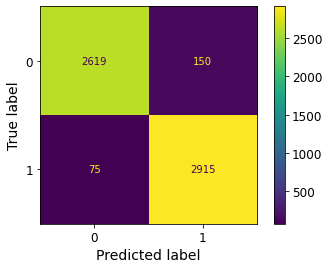

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_fig=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))

cm_fig.plot()



In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2769
           1       0.95      0.97      0.96      2990

    accuracy                           0.96      5759
   macro avg       0.96      0.96      0.96      5759
weighted avg       0.96      0.96      0.96      5759

